In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
df = pd.read_csv("Advertising.csv")

In [343]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [344]:
df['total_spend'] = df[['TV', 'radio', 'newspaper']].sum(axis=1)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TV           200 non-null    float64
 1   radio        200 non-null    float64
 2   newspaper    200 non-null    float64
 3   sales        200 non-null    float64
 4   total_spend  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [346]:
df.corr()

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

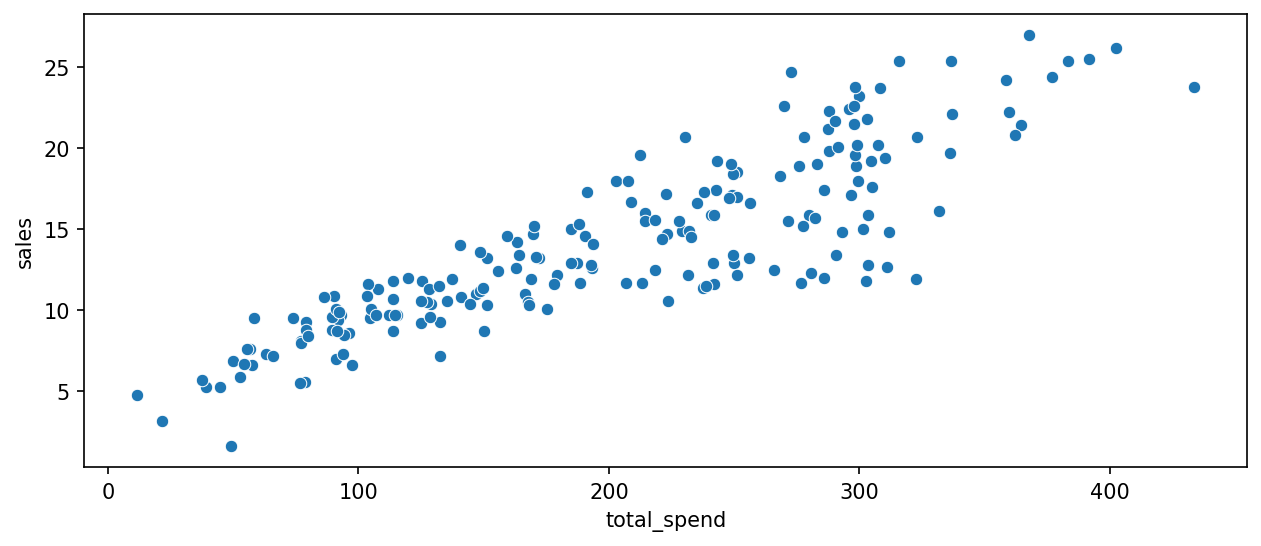

In [347]:
plt.figure(figsize=(10, 4), dpi=150)

sns.scatterplot(data=df, x='total_spend', y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

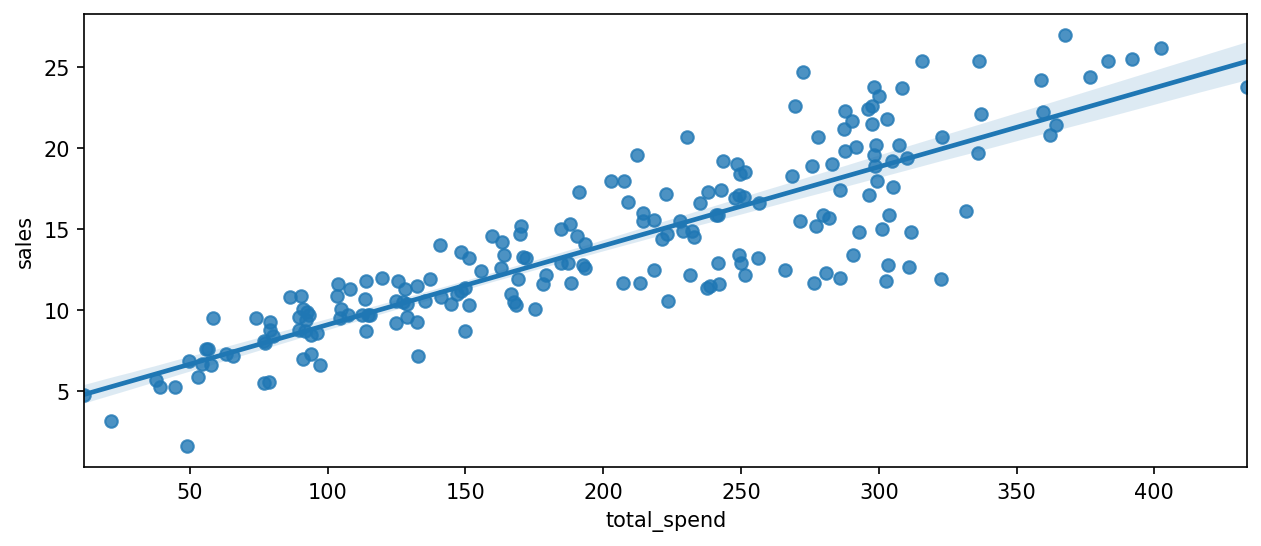

In [348]:
plt.figure(figsize=(10, 4), dpi=150)

sns.regplot(data=df, x='total_spend', y='sales')

In [349]:
X = df['total_spend']
y = df['sales']

In [350]:
b = np.polyfit(X, y, 1)

In [351]:
potential_spend = np.linspace(0, 500, 100)

In [352]:
predicted_sales = b[0] * potential_spend + b[1]

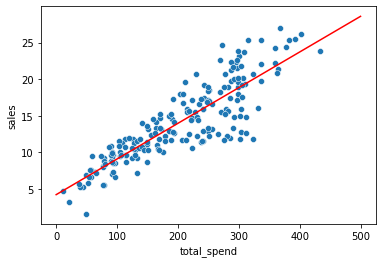

In [353]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predicted_sales, c='r')

In [354]:
spend = 200

predicted_sales = b[0] * spend + b[1]

In [355]:
b = np.polyfit(X, y, 3)

In [356]:
b

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [357]:
pot_spend = np.linspace(0, 500, 100)

In [358]:
pred_sales = b[0] * pot_spend ** 3 + b[1] * pot_spend ** 2 + b[2] * pot_spend + b[3]

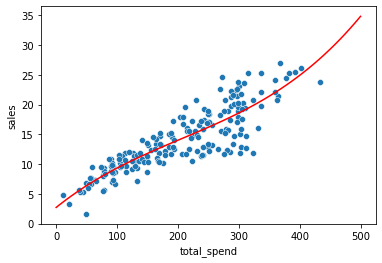

In [359]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(pot_spend, pred_sales, c='r')

# Scikit-Learn

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
df = pd.read_csv('Advertising.csv')

In [362]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:title={'center':'newspaper'}, xlabel='newspaper', ylabel='sales'>

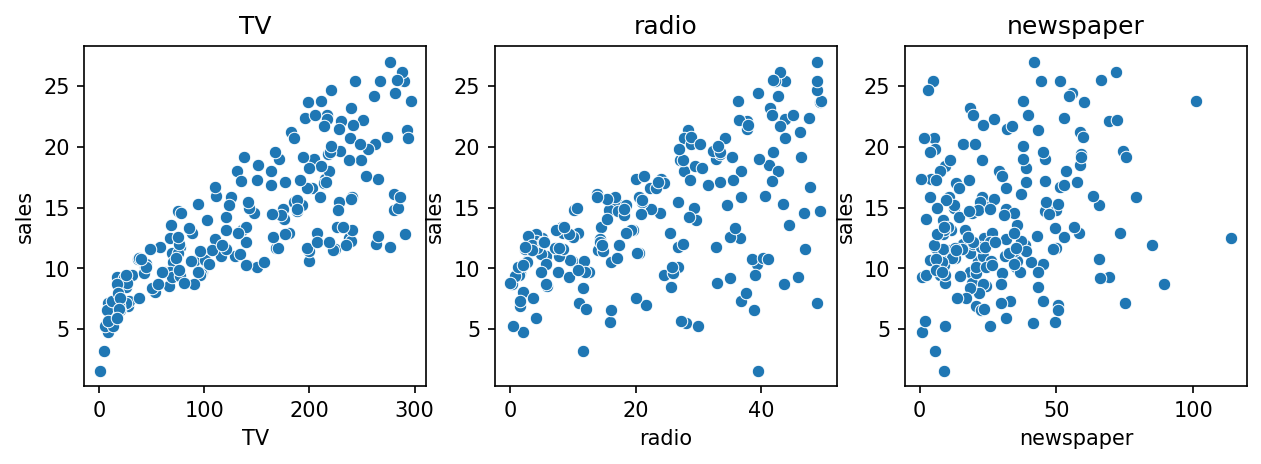

In [364]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), dpi=150)

ax[0].set_title('TV')
sns.scatterplot(data=df, x='TV', y='sales', ax=ax[0])

ax[1].set_title('radio')
sns.scatterplot(data=df, x='radio', y='sales', ax=ax[1])

ax[2].set_title('newspaper')
sns.scatterplot(data=df, x='newspaper', y='sales', ax=ax[2])

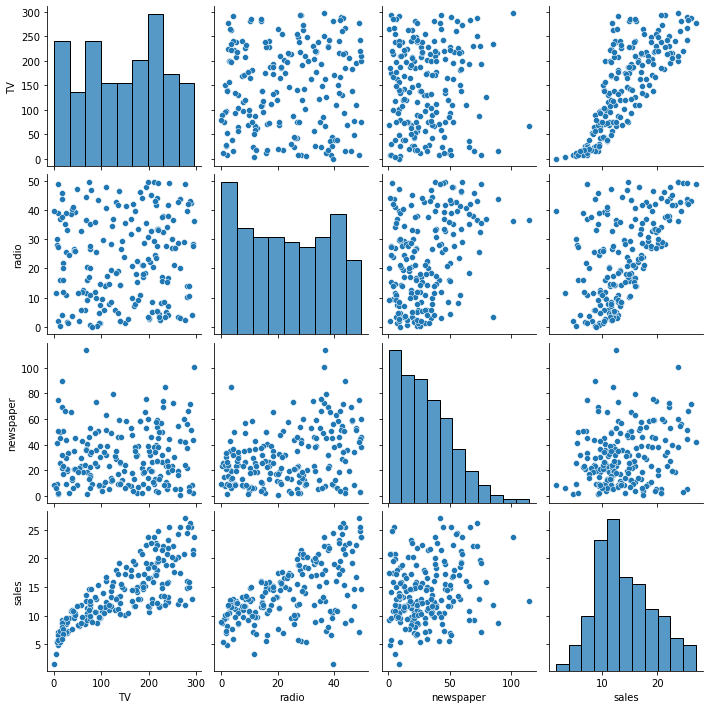

In [365]:
sns.pairplot(data=df)

In [366]:
X = df.drop('sales', axis=1)
y = df['sales']

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [369]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

# Create Estimator

In [370]:
from sklearn.linear_model import LinearRegression

In [371]:
model = LinearRegression()

In [372]:
model.fit(X_train, y_train)

LinearRegression()

In [373]:
test_predictions = model.predict(X_test)

In [374]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [375]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [376]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

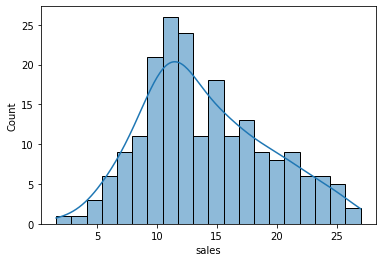

In [377]:
sns.histplot(data=df, x='sales', kde=True, bins=20)

In [378]:
mae = mean_absolute_error(y_test, test_predictions)

In [379]:
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# Residual Plots

In [380]:
test_residuals = y_test - test_predictions

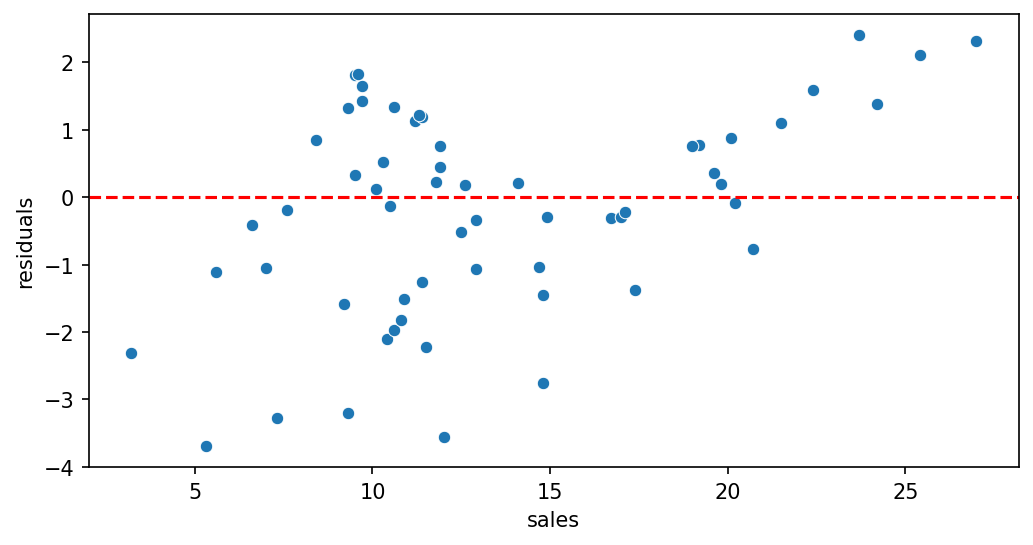

In [381]:
plt.figure(figsize=(8, 4), dpi=150)

plt.ylabel('residuals')
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

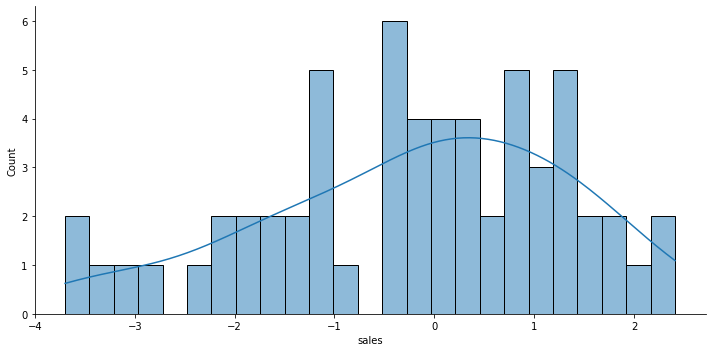

In [382]:
sns.displot(x=test_residuals, kde=True, bins=25, height=5, aspect=2)

In [383]:
import scipy as sp

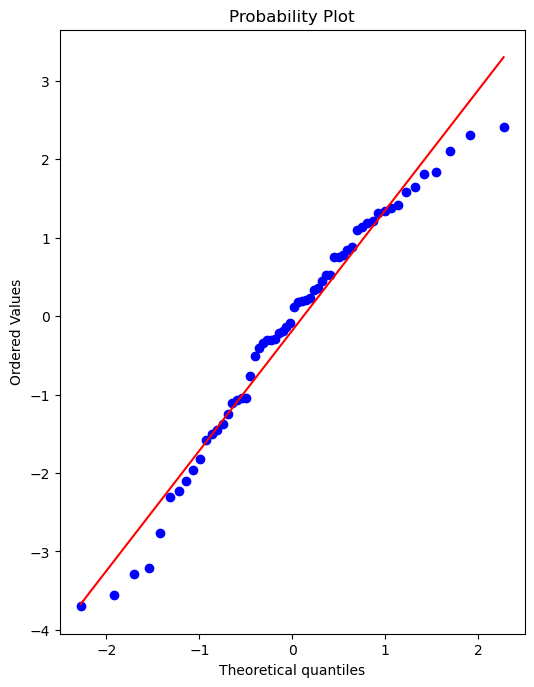

In [384]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)

_ = sp.stats.probplot(test_residuals, plot=ax)

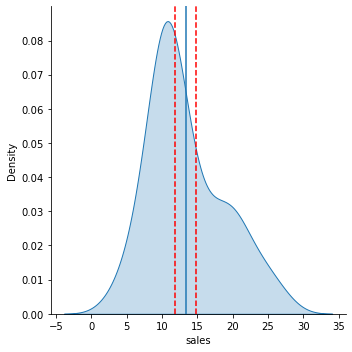

In [385]:
sns.displot(x=y_test, kind='kde', fill=True)
plt.axvline(x=-rmse + y_test.mean(), color='r', linestyle='--')
plt.axvline(x=rmse + y_test.mean(), color='r', linestyle='--')
plt.axvline(x=y_test.mean())

In [386]:
final_model = LinearRegression()

In [387]:
final_model.fit(X, y)

LinearRegression()

In [388]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [389]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [390]:
X.iloc[1]['TV'] * final_model.coef_[0] + X.iloc[1]['radio'] * final_model.coef_[1] + X.iloc[1]['newspaper'] * final_model.coef_[2]

9.398965451434947

In [391]:
y.iloc[1]

10.4

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

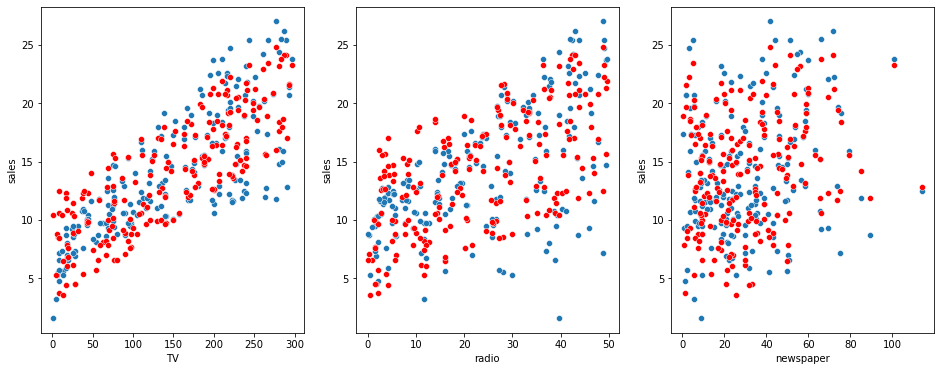

In [392]:
final_predict = final_model.predict(X)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 6))

sns.scatterplot(x=df['TV'], y=df['sales'], ax=ax[0])
sns.scatterplot(x=df['TV'], y=final_predict, ax=ax[0], color='r')

sns.scatterplot(x=df['radio'], y=df['sales'], ax=ax[1])
sns.scatterplot(x=df['radio'], y=final_predict, ax=ax[1], color='r')

sns.scatterplot(x=df['newspaper'], y=df['sales'], ax=ax[2])
sns.scatterplot(x=df['newspaper'], y=final_predict, ax=ax[2], color='r')

In [393]:
from joblib import dump, load

In [394]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [395]:
loaded_model = load('final_sales_model.joblib')

In [396]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [397]:
X.shape

(200, 3)

In [398]:
campaign = [[149, 22, 12]]

In [399]:
loaded_model.predict(campaign)

array([13.893032])

## Polynomial Regression

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
df = pd.read_csv('Advertising.csv')

In [402]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [403]:
X = df.drop('sales', axis=1)
y = df['sales']

In [404]:
from sklearn.preprocessing import PolynomialFeatures

In [405]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [406]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [407]:
poly_features = polynomial_converter.transform(X)

In [408]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [409]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [410]:
poly_features = polynomial_converter.fit_transform(X)

In [411]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

## Training and Evaluating Model

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
X = df.drop('sales', axis=1)
y = df['sales']

In [462]:
from sklearn.preprocessing import PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [463]:
from sklearn.model_selection import train_test_split

In [464]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [465]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [466]:
model.fit(X_train, y_train)

LinearRegression()

In [467]:
test_predicitons =  model.predict(X_test)
residual = y_test - test_predicitons

In [473]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [480]:
MAE = mean_absolute_error(y_test, test_predicitons)

In [481]:
MSE = mean_squared_error(y_test, test_predicitons)

In [482]:
RMSE = np.sqrt(MSE)

In [483]:
MAE

0.48967980448038373

In [484]:
RMSE

0.6646431757269274

In [485]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [486]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [487]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

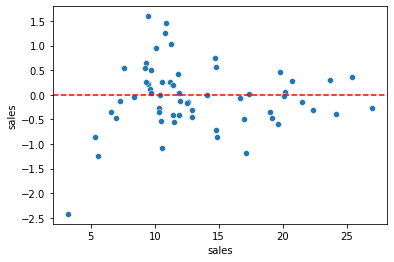

In [468]:
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color='r', linestyle='--')

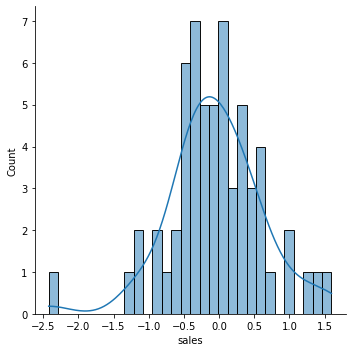

In [469]:
sns.displot(x=residual, kde=True, bins=30)

In [470]:
import scipy as sp

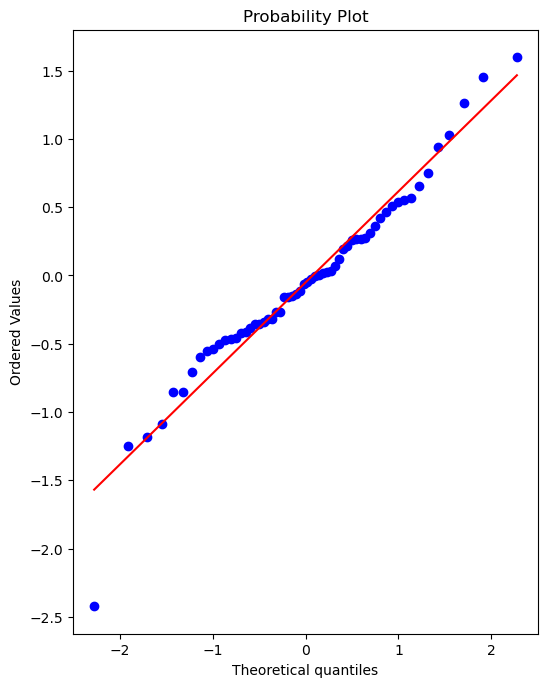

In [471]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = sp.stats.probplot(residual, plot=ax)

## Adjusting Model Parameters

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [489]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [537]:
X = df.drop('sales', axis=1)
y = df['sales']

In [538]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT the results (error vs poly order)

In [583]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [584]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399345,
 0.2509342962601728,
 0.19367554734830825,
 5.421761733493438,
 0.15287504491091736,
 0.17309760925998408]

In [585]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825215619,
 0.5077742637898888,
 2.5758141220971607,
 4.295474436700304,
 1379.0315318643934,
 3730.9337397090517,
 95666.27487623165]

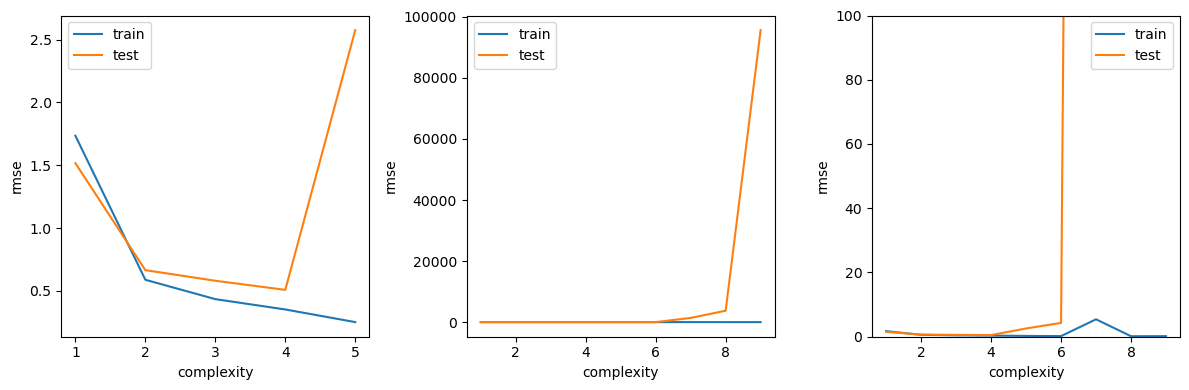

In [589]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100, ncols=3, nrows=1)

ax[0].set_xlabel('complexity')
ax[0].set_ylabel('rmse')

sns.lineplot(x=range(1, 6), y=train_rmse_error[:5], ax=ax[0], label='train')
sns.lineplot(x=range(1, 6) ,y=test_rmse_error[:5], ax=ax[0], label='test')

ax[1].set_xlabel('complexity')
ax[1].set_ylabel('rmse')

sns.lineplot(x=range(1, 10), y=train_rmse_error, ax=ax[1], label='train')
sns.lineplot(x=range(1, 10), y=test_rmse_error, ax=ax[1], label='test')

ax[2].set_xlabel('complexity')
ax[2].set_ylabel('rmse')
ax[2].set_ylim(0, 100)

sns.lineplot(x=range(1, 10), y=train_rmse_error, ax=ax[2], label='train')
sns.lineplot(x=range(1, 10), y=test_rmse_error, ax=ax[2], label='test')

plt.legend()
plt.tight_layout()

## Model Deployment

In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [614]:
X = df.drop('sales', axis=1)
y = df['sales']

In [622]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [623]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [631]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)

In [632]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, test_pred))

In [633]:
rmse

0.6646431757269274

In [634]:
residual = y_test - test_pred

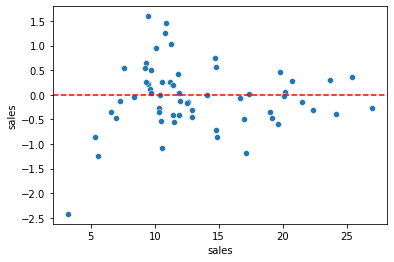

In [635]:
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color='r', linestyle='--')

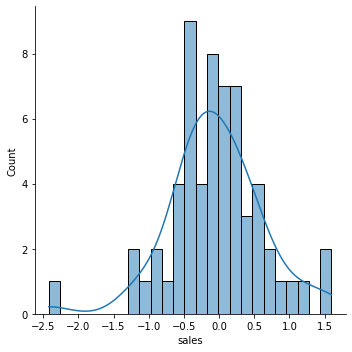

In [636]:
sns.displot(x=residual, kde=True, bins=25)

In [637]:
final_poly_convert = PolynomialFeatures(degree=3, include_bias=False)

In [638]:
final_model = LinearRegression()

In [643]:
full_converted_X = final_poly_convert.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [644]:
from joblib import dump, load

In [645]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [646]:
dump(final_poly_convert, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [647]:
loaded_poly_converter = load('final_poly_converter.joblib')

In [648]:
loaded_poly_model = load('final_poly_model.joblib')

In [653]:
campaign = [[149, 22, 12]]
transformed_data = final_poly_converter.fit_transform(test_pred)

In [654]:
final_model.predict(transformed_data)

array([14.34328676])